In [1]:
import pandas as pd
import numpy as np

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# 전처리
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 알고리즘
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# 검정
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, \
recall_score, f1_score, roc_auc_score

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df = pd.read_csv('E:/FinancialDataMining/data/BankPersonalLoan.csv')

In [3]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [6]:
df['Experience'].value_counts()

 32    154
 20    148
 9     147
 5     146
 23    144
 35    143
 25    142
 28    138
 18    137
 19    135
 26    134
 24    131
 3     129
 14    127
 16    127
 30    126
 34    125
 27    125
 17    125
 29    124
 22    124
 7     121
 8     119
 6     119
 15    119
 10    118
 33    117
 13    117
 11    116
 37    116
 36    114
 21    113
 4     113
 31    104
 12    102
 38     88
 39     85
 2      85
 1      74
 0      66
 40     57
 41     43
-1      33
-2      15
 42      8
-3       4
 43      3
Name: Experience, dtype: int64

In [7]:
df['Experience'].median()

20.0

In [8]:
df[df['Experience']<0]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,316,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,452,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,525,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,537,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,541,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,577,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,584,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
597,598,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1


In [9]:
df[df['Experience']<0].count()

ID                    52
Age                   52
Experience            52
Income                52
ZIP Code              52
Family                52
CCAvg                 52
Education             52
Mortgage              52
Personal Loan         52
Securities Account    52
CD Account            52
Online                52
CreditCard            52
dtype: int64

In [10]:
df[df['Age']<30].mean().round()

ID                     2434.0
Age                      27.0
Experience                2.0
Income                   79.0
ZIP Code              93237.0
Family                    3.0
CCAvg                     2.0
Education                 2.0
Mortgage                 60.0
Personal Loan             0.0
Securities Account        0.0
CD Account                0.0
Online                    1.0
CreditCard                0.0
dtype: float64

In [11]:
df['Experience'] = df['Experience'].mask(df['Experience']<0, 2)

In [12]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.140400,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.405644,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [13]:
df.drop(['ID', 'ZIP Code'], axis = 1, inplace = True)

In [14]:
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


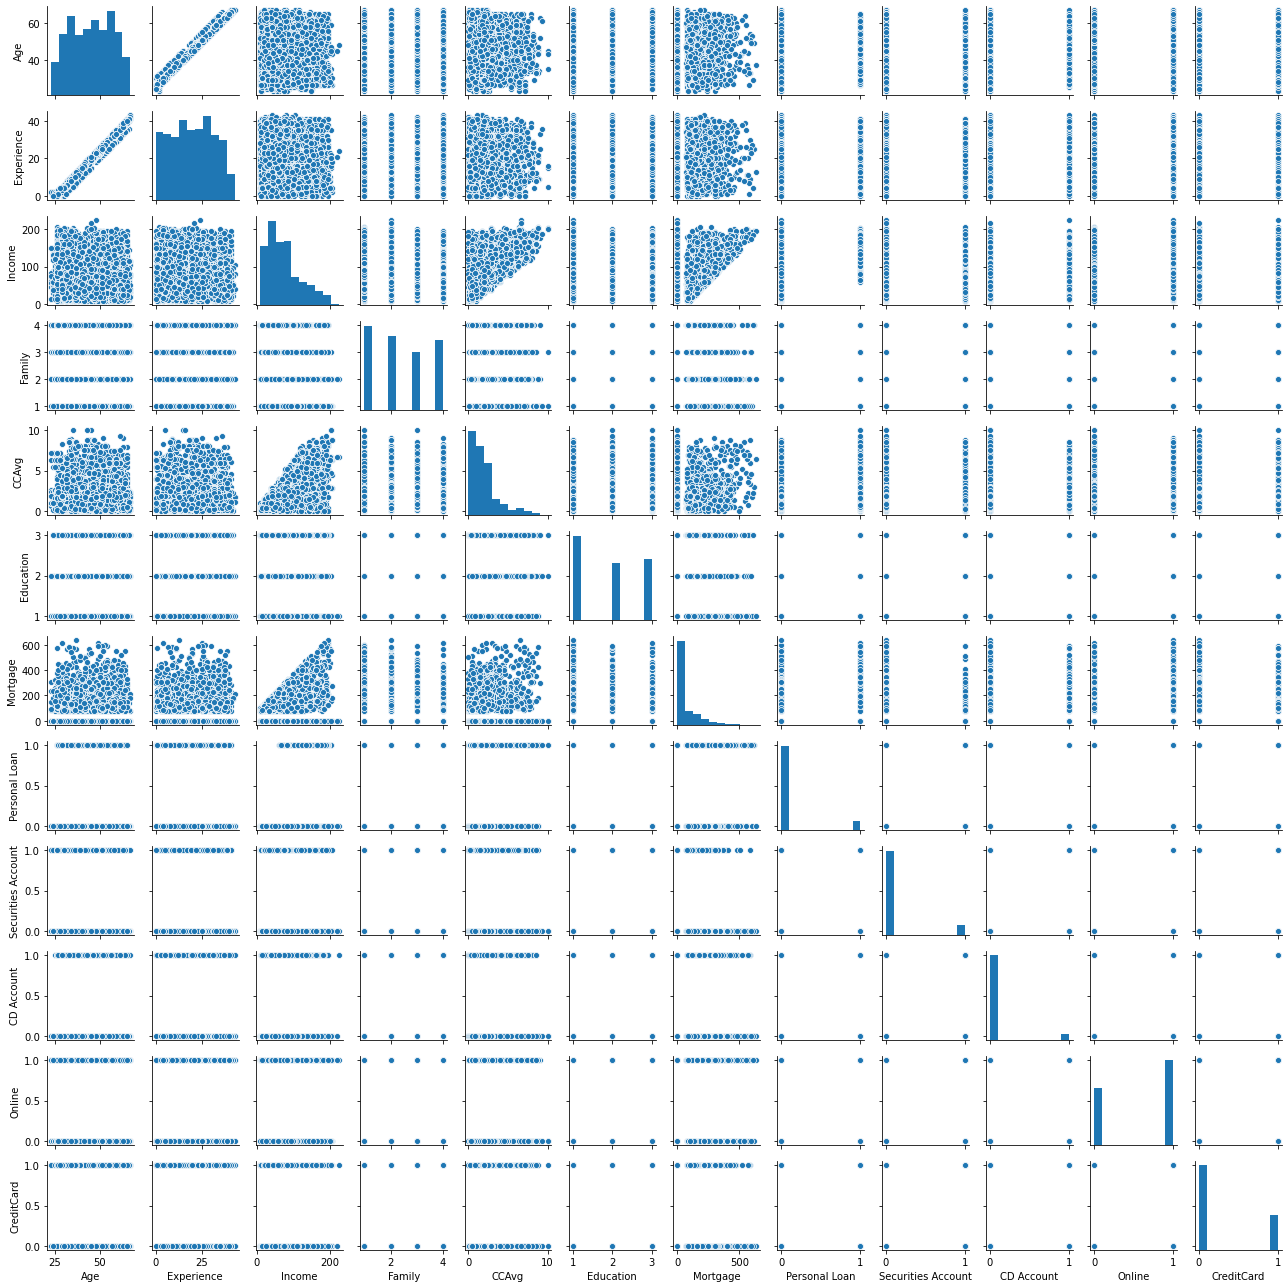

In [15]:
sns.pairplot(df, height = 1.5)
plt.tight_layout()
plt.show()

---

In [16]:
df.corr()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.993922,-0.055269,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.993922,1.000000,-0.047024,-0.051627,-0.049865,0.014003,-0.011104,-0.008477,-0.001049,0.009614,0.013944,0.008915
Income,-0.055269,-0.047024,1.000000,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.046418,-0.051627,-0.157501,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.049865,0.645984,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.014003,-0.187524,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.011104,0.206806,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.008477,0.502462,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.001049,-0.002616,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.009614,0.169738,0.014110,0.136534,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644


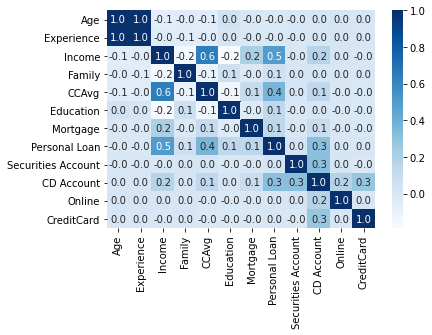

In [17]:
sns.heatmap(df.corr(), fmt = '.1f', cmap='Blues', annot = True)

In [18]:
df[['Age', 'Experience', 'Personal Loan']].corr()

,Age,Experience,Personal Loan
Age,1.000000,0.993922,-0.007726
Experience,0.993922,1.000000,-0.008477
Personal Loan,-0.007726,-0.008477,1.000000


In [19]:
X = df.drop(['Age', 'Personal Loan'], axis=1)

In [20]:
y = df['Personal Loan']

In [21]:
# stratify = y : y의 빈도를 균일하게
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1, stratify = y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3500, 10) (1500, 10) (3500,) (1500,)


In [22]:
# 함수 활성화
ss = StandardScaler()

X_train.iloc[:,:] = ss.fit_transform(X_train.iloc[:,:])
X_test.iloc[:,:] = ss.transform(X_test.iloc[:,:])

In [23]:
# 모델 생성 및 학습 - DM방식
model1 = sm.Logit(y_train, X_train)
result1 = model1.fit()

Optimization terminated successfully.
         Current function value: 0.617245
         Iterations 6


In [24]:
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3490
Method:                           MLE   Df Model:                            9
Date:                Fri, 04 Jun 2021   Pseudo R-squ.:                 -0.9520
Time:                        01:09:00   Log-Likelihood:                -2160.4
converged:                       True   LL-Null:                       -1106.7
Covariance Type:            nonrobust   LLR p-value:                     1.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Experience             0.0370      0.037      1.008      0.313      -0.035       0.109
Income                 0.7018      0.053     13.353      0.000       0.599       0.805
Family                 0.1866      0.038      4.969      0.000       0.113       0.260
CCAvg                  0.0633      0.049      1.280      0.201      -0.034       0.160
Education              0.3363      0.038      8.812      0.000       0.261       0.411
Mortgage               0.0475      0.040      1.202      0.230      -0.030       0.125
Securities Account    -0.1093      0.040     -2.705      0.007      -0.189      -0.030
CD Account             0.4516      0.053      8.487      0.000       0.347       0.556
Online                -0.0535      0.037     -1.455      0.146      -0.126       0.019
CreditCard            -0.0930      0.038     -2.431      0.015      -0.168      -0.018
======================================================================================
"""

In [25]:
# coef = 로짓값 = params
result1.params

Experience            0.037009
Income                0.701804
Family                0.186650
CCAvg                 0.063260
Education             0.336269
Mortgage              0.047494
Securities Account   -0.109329
CD Account            0.451557
Online               -0.053535
CreditCard           -0.092997
dtype: float64

In [26]:
# exp(로짓) = 오즈
np.exp(result1.params).round(2)

Experience            1.04
Income                2.02
Family                1.21
CCAvg                 1.07
Education             1.40
Mortgage              1.05
Securities Account    0.90
CD Account            1.57
Online                0.95
CreditCard            0.91
dtype: float64

In [27]:
# 모델 생성 및 학습 - ML방식
model2 = LogisticRegression(solver='liblinear', penalty='l2', C = 0.001, random_state = 1)
model2.fit(X_train, y_train)

LogisticRegression(C=0.001, random_state=1, solver='liblinear')

In [28]:
y_pred = model2.predict(X_test)

In [29]:
y_pred_p = model2.predict_proba(X_test)
print(y_pred_p)

[[0.50039735 0.49960265]
 [0.68226943 0.31773057]
 [0.7577329  0.2422671 ]
 ...
 [0.59746731 0.40253269]
 [0.75430337 0.24569663]
 [0.5416265  0.4583735 ]]


In [30]:
pd.DataFrame(confusion_matrix(y_test, y_pred))

,0,1
0,1337,19
1,82,62


In [31]:
print('오분류 개수 :', (y_test != y_pred).sum())
print('정확도 :', accuracy_score(y_test, y_pred).round(3))

오분류 개수 : 101
정확도 : 0.933


---

In [32]:
df = pd.read_csv('E:/FinancialDataMining/data/clean_PersonalLoan.csv')

In [33]:
X = df.drop('Personal Loan', axis = 1)
y = df['Personal Loan']

In [34]:
# stratify = y : y의 빈도를 균일하게
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1, stratify = y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3500, 10) (1500, 10) (3500,) (1500,)


In [35]:
# 함수 활성화
ss = StandardScaler()

X_train.iloc[:,:] = ss.fit_transform(X_train.iloc[:,:])
X_test.iloc[:,:] = ss.transform(X_test.iloc[:,:])

In [36]:
# 모델 생성 및 학습 - ML방식
Logit_m = LogisticRegression(solver='liblinear', penalty='l2', C = 0.001, random_state = 1)
Logit_m.fit(X_train, y_train)

LogisticRegression(C=0.001, random_state=1, solver='liblinear')

In [37]:
y_pred = Logit_m.predict(X_test)

In [38]:
pd.DataFrame(confusion_matrix(y_test, y_pred))

,0,1
0,1337,19
1,82,62


In [39]:
print('오분류 개수 : ', (y_test != y_pred).sum())
print('정확도 : ', round(accuracy_score(y_test, y_pred),3))
print('정밀도 : ', round(precision_score(y_test, y_pred),3))
print('재현율 : ', round(recall_score(y_test, y_pred),3))
print('f1 : ', round(f1_score(y_test, y_pred),3))
print('auc : ', round(roc_auc_score(y_test, y_pred),3))

오분류 개수 :  101
정확도 :  0.933
정밀도 :  0.765
재현율 :  0.431
f1 :  0.551
auc :  0.708
